In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Define the patterns
zero = np.array([ # np.matrix
0, 1, 1, 1, 0,
1, 0, 0, 0, 1,
1, 0, 0, 0, 1,
1, 0, 0, 0, 1,
1, 0, 0, 0, 1,
0, 1, 1, 1, 0
])
one = np.array([
0, 1, 1, 0, 0,
0, 0, 1, 0, 0,
0, 0, 1, 0, 0,
0, 0, 1, 0, 0,
0, 0, 1, 0, 0,
0, 0, 1, 0, 0
])
two = np.array([
1, 1, 1, 0, 0,
0, 0, 0, 1, 0,
0, 0, 0, 1, 0,
0, 1, 1, 0, 0,
1, 0, 0, 0, 0,
1, 1, 1, 1, 1,
])
# define noisy patterns
noisy0 =np.array([
0, 1, 1, 1, 0,
1, 0, 0, 0, 0,
1, 0, 0, 0, 1, 
0, 0, 0, 0, 0,
0, 0, 0, 0, 0,
0, 0, 1, 0, 0,
])
noisy2 = np.array([
1, 1, 1, 0, 0,
0, 0, 0, 0, 0,
0, 0, 0, 0, 0,
0, 0, 1, 0, 0,
1, 0, 0, 0, 0,
1, 1, 0, 0, 1,
])
noisy2b = np.array([
1, 1, 1, 0, 0,
0, 0, 0, 1, 0,
0, 0, 0, 1, 0,
0, 0, 0, 0, 0,
0, 0, 0, 0, 0,
0, 0, 0, 0, 0,
])

In [20]:
zero = np.where(zero==0, -1, zero)
one  = np.where(one == 0, -1, one)
two  = np.where(two == 0,-1,two)

noisy0 = np.where(noisy0 == 0,-1,noisy0)
noisy2 = np.where(noisy2 == 0,-1,noisy2)
noisy2b = np.where(noisy2b == 0,-1,noisy2b)

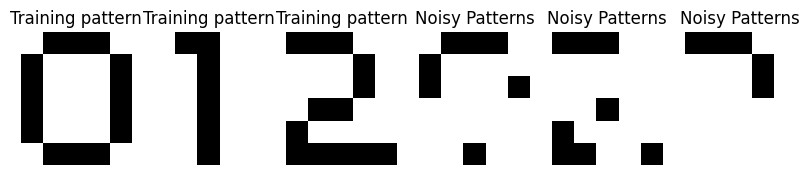

In [21]:
# i dont use the variable 'patterns' later. just for reminding myself how matrices look like 
patterns = np.vstack((zero, one, two, noisy0, noisy2, noisy2b))

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))

for i, ax in enumerate(axs):
    ax.imshow(patterns[i].reshape((6,5)), cmap='Greys')
    if i <=2:
        ax.set_title(f"Training pattern")
    else:
        ax.set_title(f"Noisy Patterns")
    ax.axis('off')

plt.show()

In [22]:
def add_noise(arr):
    # Get indices of 1s in input array
    ones_idx = np.where(arr == 1)[0]

    # Calculate number of 1s to flip
    num_flips = int(round(len(ones_idx) * 0.1))

    # Randomly select indices to flip
    flip_idx = np.random.choice(ones_idx, size=num_flips, replace=False)

    # Create noisy versions by flipping selected indices
    noisy1 = np.copy(arr)
    noisy2 = np.copy(arr)
    noisy1[flip_idx] = 0
    noisy2[flip_idx] = 0

    noisy1 = np.outer(noisy1,noisy1)
    noisy2 = np.outer(noisy2,noisy2)
    
    return noisy1, noisy2


Text(0.5, 1.0, ' Weights matrix')

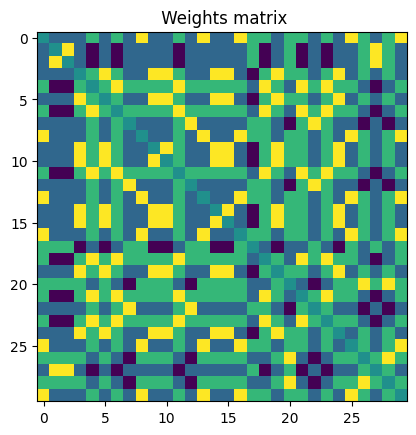

In [23]:
# here by hand i create the weighs matrice
N = len(zero) # no mater which patter i take

weight4_noisy01, weight4_noisy02 = add_noise(zero)
weight5_noisy11, weight5_noisy12 = add_noise(one)
weight6_noisy21, weight6_noisy22 = add_noise(two)

weight1 = np.outer(zero,zero) # as shown during friday
weight2 = np.outer(one,one)
weight3 = np.outer(two,two)

#weights = weight1 + weight4_noisy01 + weight4_noisy02 + weight2 + weight5_noisy11 + weight5_noisy12 + weight3 + weight6_noisy21 + weight6_noisy22# we sum them all up

weights = weight1 + weight2 + weight3

diagW = np.diag(np.diag(weights)) # we get all diagnal values
weights = weights - diagW # from our original matrice we subtract them
weights = weights/9 # we divide by 3(number of training patterns)

plt.imshow(weights)
plt.title(' Weights matrix')

In [24]:
def synch_update(state, W): 
    new_state = np.zeros_like(state) # we create empty array
    for i in range(state.shape[0]): # for every neuron (30 in total)
        if np.dot(W[i, :], state) > 0: # we set the spin on pattern matrix to either 1 or -1
            new_state[i] = 1
        else:
            new_state[i] = -1
    return new_state # this function is for single update

def asynch_update_SingleNeuron(x, W): # we take a random single neuron and update pattern
    N = x.shape[0]
    i = np.random.randint(N)
    a_i = np.dot(W[i,:], x)
    new_x_i = np.sign(a_i)
    x[i] = new_x_i
    return x

def run_hopfield(start_state,weights, method, iterations = 100):
    start_state = np.copy(start_state)

    # create a subplot with 1 row and 3 columns
    plt.figure()
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    axs[0].imshow(start_state.reshape((6,5)),cmap='Greys')


    Energy = [-0.5*np.dot(np.dot(start_state.T, weights), start_state)]
    for i in range(iterations):
        if method == 'asynch':
            new_state = asynch_update_SingleNeuron(start_state,weights)
        elif method == 'synch':
            new_state = synch_update(start_state,weights)
        
        Energy.append(-0.5*np.dot(np.dot(new_state.T, weights), new_state))
        start_state = new_state
    
    

# plot the rest
    
    axs[1].imshow(new_state.reshape((6,5)),cmap='Greys')
    axs[2].plot(Energy)

    axs[0].set_title('original noisy pattern')
    axs[1].set_title('after updates')
    axs[2].set_title('Energ over updates')

    plt.show()

    return new_state, Energy

<Figure size 640x480 with 0 Axes>

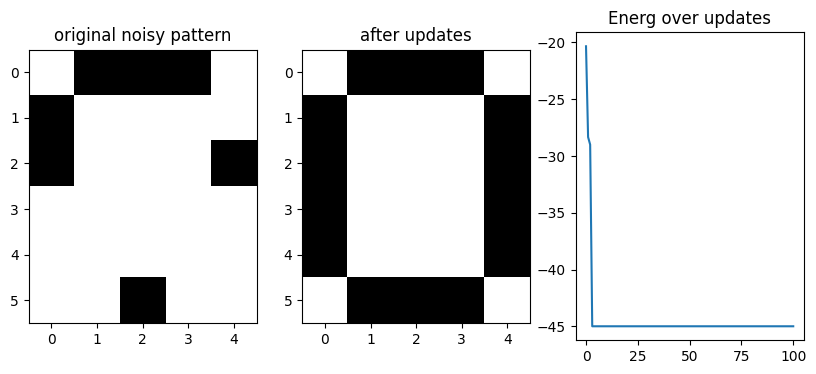

(array([-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1]),
 [-20.333333333333336,
  -28.33333333333333,
  -29.000000000000007,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  -45.0,
  

In [25]:
run_hopfield(noisy0,weights,'synch',100)

<Figure size 640x480 with 0 Axes>

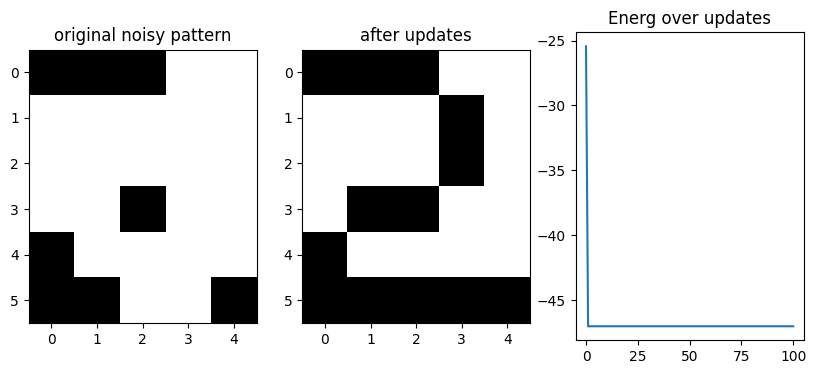

(array([ 1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,
         1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1]),
 [-25.444444444444446,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -46.99999999999999,
  -

In [26]:
run_hopfield(noisy2,weights,'synch',100)

<Figure size 640x480 with 0 Axes>

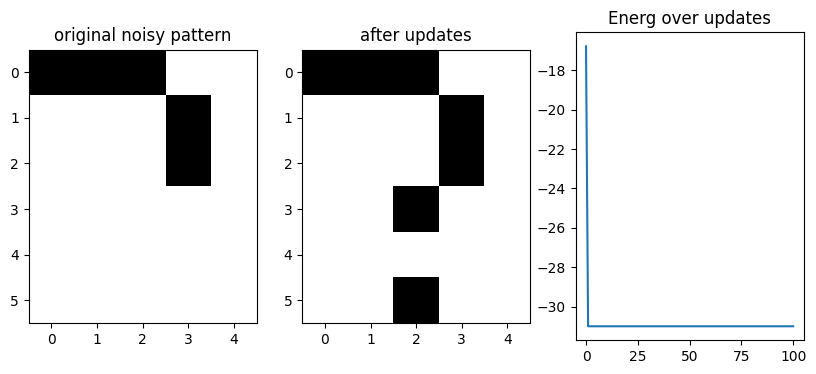

(array([ 1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
         1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 [-16.777777777777775,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.999999999999986,
  -30.99999

In [27]:
run_hopfield(noisy2b,weights,'synch',100)

<Figure size 640x480 with 0 Axes>

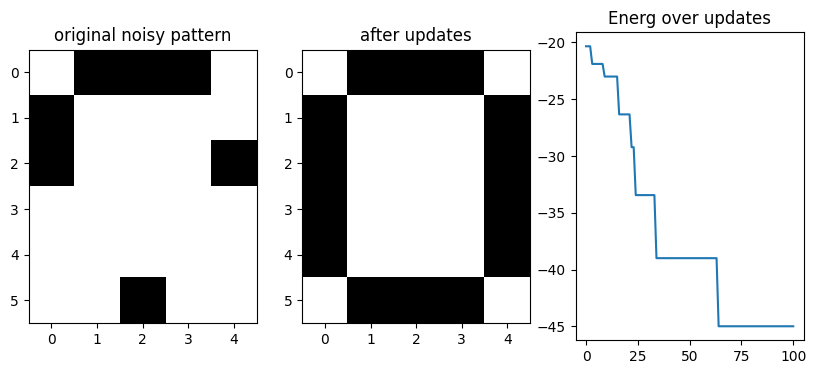

(array([-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1]),
 [-20.333333333333336,
  -20.333333333333336,
  -20.333333333333336,
  -21.88888888888889,
  -21.88888888888889,
  -21.88888888888889,
  -21.88888888888889,
  -21.88888888888889,
  -21.88888888888889,
  -23.000000000000007,
  -23.000000000000007,
  -23.000000000000007,
  -23.000000000000007,
  -23.000000000000007,
  -23.000000000000007,
  -23.000000000000007,
  -26.333333333333332,
  -26.333333333333332,
  -26.333333333333332,
  -26.333333333333332,
  -26.333333333333332,
  -26.333333333333332,
  -29.222222222222218,
  -29.222222222222218,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -33.44444444444446,
  -38.99999999999999,
  -38.99999999999999,
  -38.99999999999999,
  -38.99999999999999,
  -38.99

In [28]:
run_hopfield(noisy0,weights,'asynch',100) # i dont need to say that but for noisy0 it finds one a lot.
# after few restarts it will find zero pattern.

<Figure size 640x480 with 0 Axes>

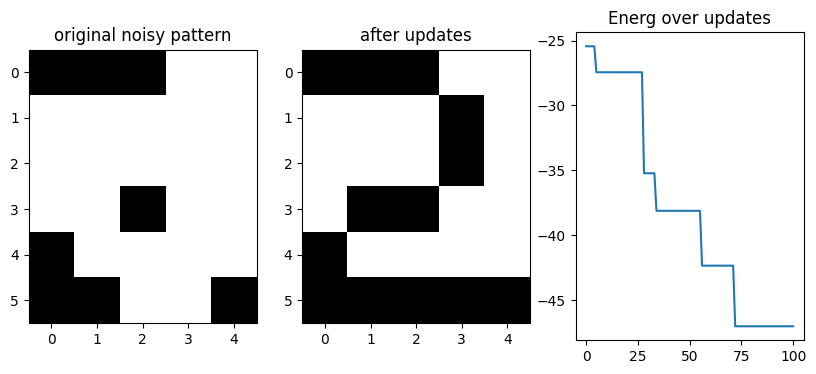

(array([ 1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,
         1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1]),
 [-25.444444444444446,
  -25.444444444444446,
  -25.444444444444446,
  -25.444444444444446,
  -25.444444444444446,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -27.444444444444443,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111

In [29]:
run_hopfield(noisy2,weights,'asynch',100)

<Figure size 640x480 with 0 Axes>

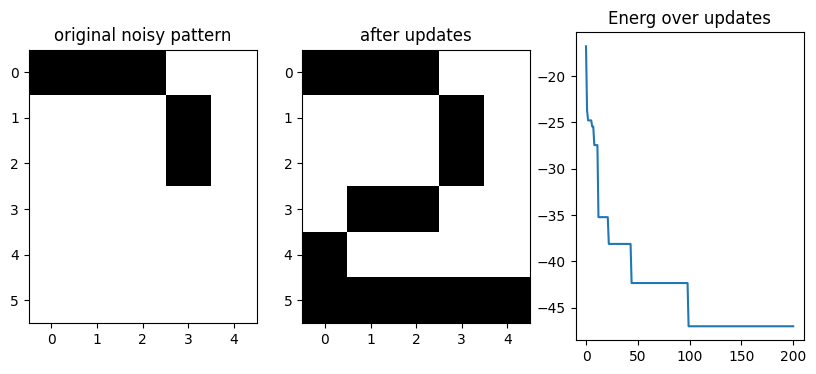

(array([ 1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,
         1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1]),
 [-16.777777777777775,
  -23.666666666666657,
  -24.777777777777775,
  -24.777777777777775,
  -24.777777777777775,
  -24.777777777777775,
  -25.444444444444446,
  -25.444444444444446,
  -27.44444444444445,
  -27.44444444444445,
  -27.44444444444445,
  -27.44444444444445,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -35.22222222222223,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.11111111111111,
  -38.111111111111

In [30]:
run_hopfield(noisy2b,weights,'asynch',200)

<Figure size 640x480 with 0 Axes>

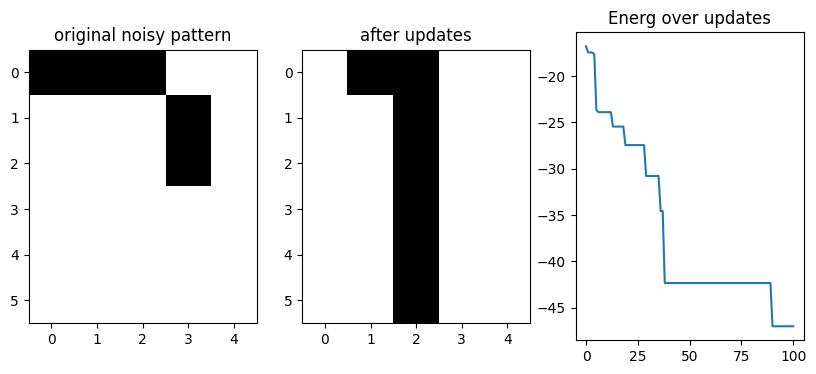

<Figure size 640x480 with 0 Axes>

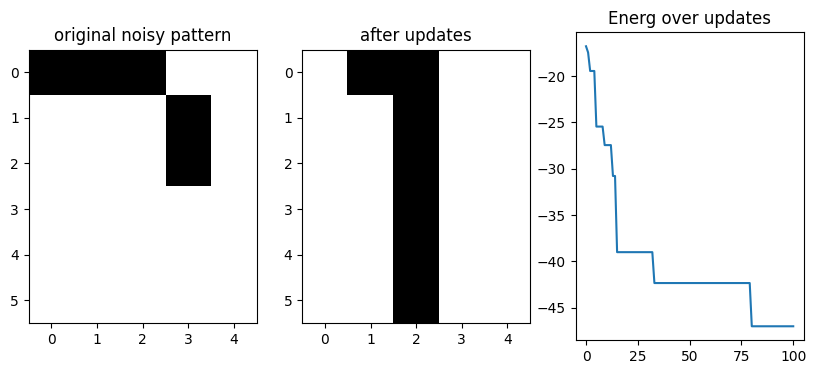

<Figure size 640x480 with 0 Axes>

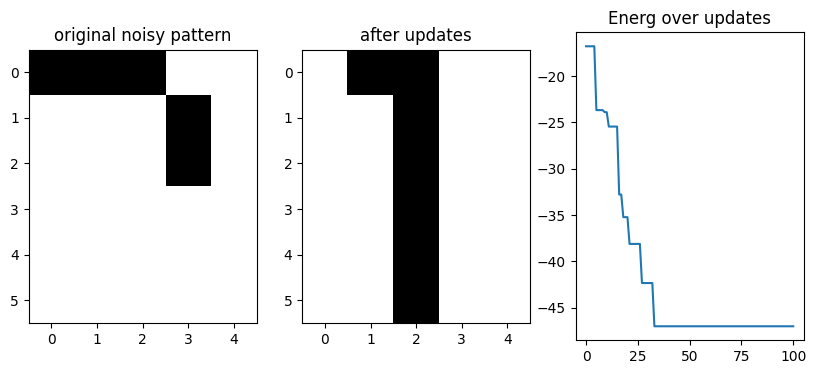

<Figure size 640x480 with 0 Axes>

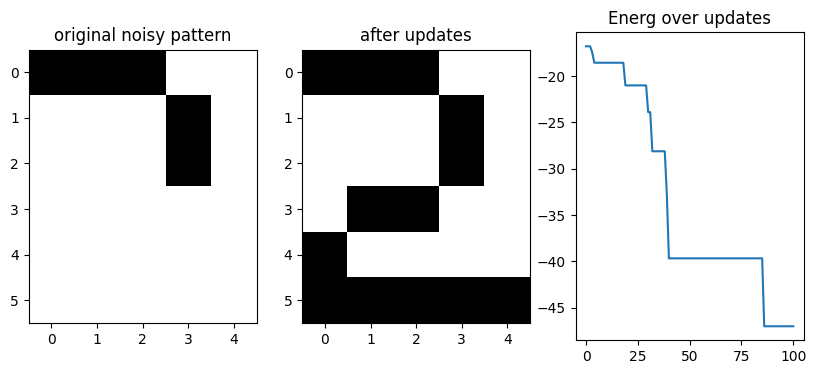

<Figure size 640x480 with 0 Axes>

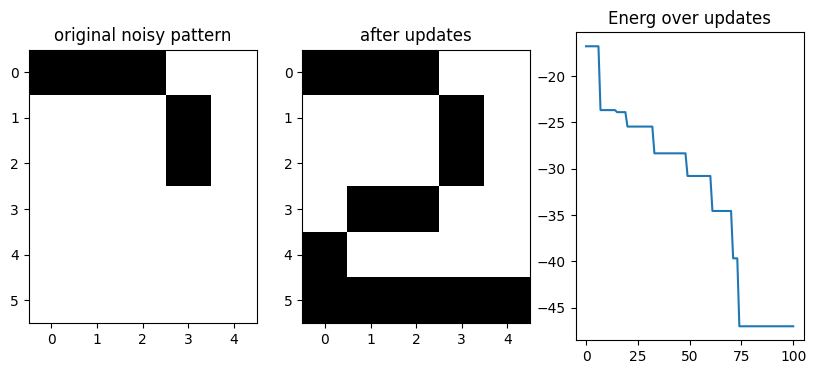

<Figure size 640x480 with 0 Axes>

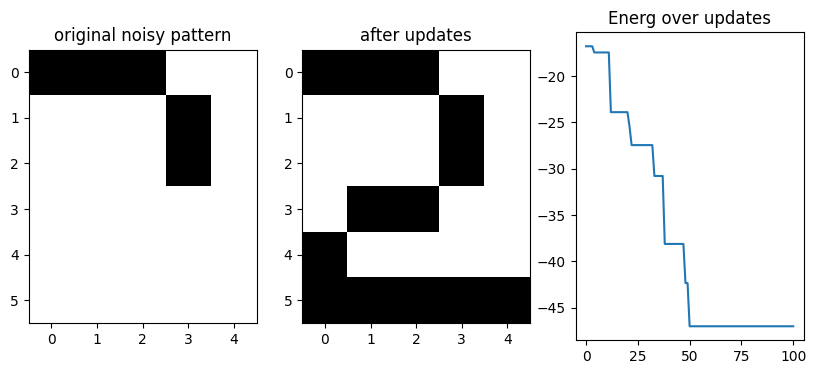

<Figure size 640x480 with 0 Axes>

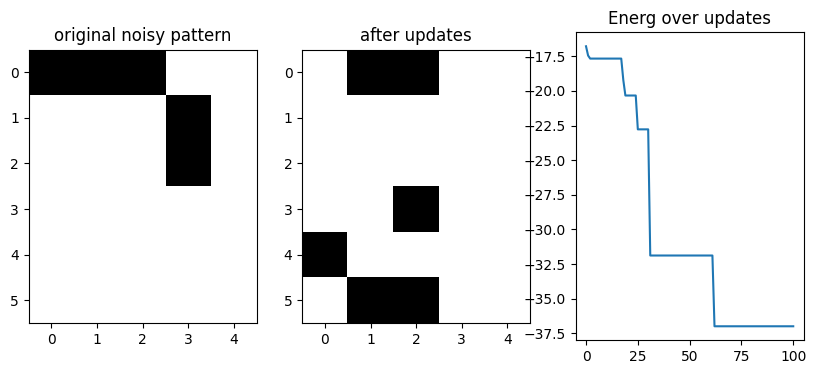

<Figure size 640x480 with 0 Axes>

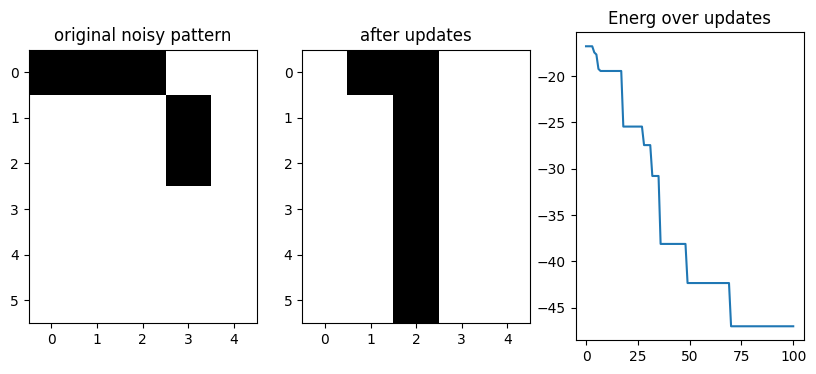

<Figure size 640x480 with 0 Axes>

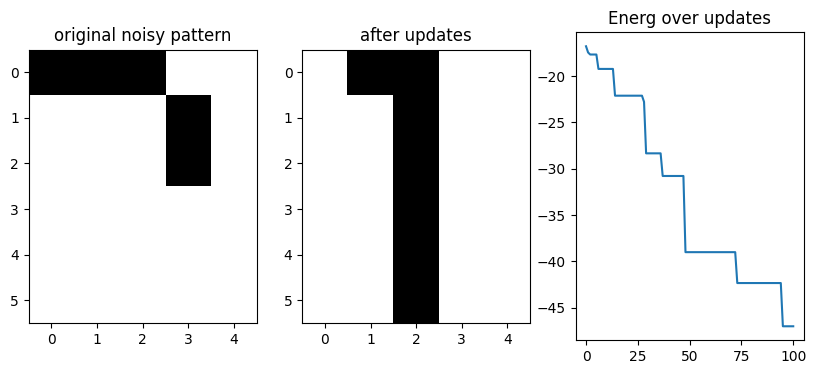

<Figure size 640x480 with 0 Axes>

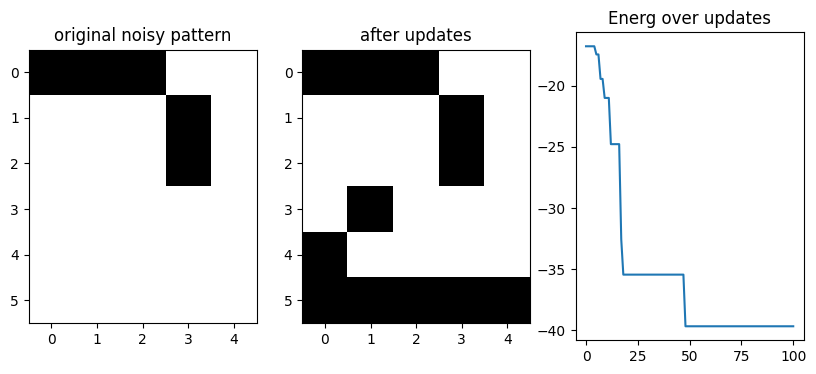

In [31]:
for i in range(10):
    run_hopfield(noisy2b,weights,'asynch',100)

# If we do the asynchronic method we can see that it not always goes to proper pattern. couse of 
# randomnes, it sometimes gets stuck in local minimum and reachest stability there.

In [32]:
# Extra task
